In [ ]:
from sklearn. neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

In [ ]:
iris = load_iris()
x , y = iris.data , iris.target
print(x[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [ ]:
# Here we use KFolds cross-validation with 20 folds
# (K=20) to evaluate the generalization efficiency of the model
# Within each fold we will then estimate the training and test error
# using the training and test sets respectively

kf = KFold(n_splits=20)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = MLPRegressor() # We have used a multilayer perceptron (MLP) regressor model
  model.fit(x_train, y_train)
  y_train_data_pred = model.predict(x_train)
  y_test_data_pred = model.predict(x_test)
  fold_training_error = mean_absolute_error(y_train, y_train_data_pred)
  fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
  list_training_error.append(fold_training_error)
  list_testing_error.append(fold_testing_error)



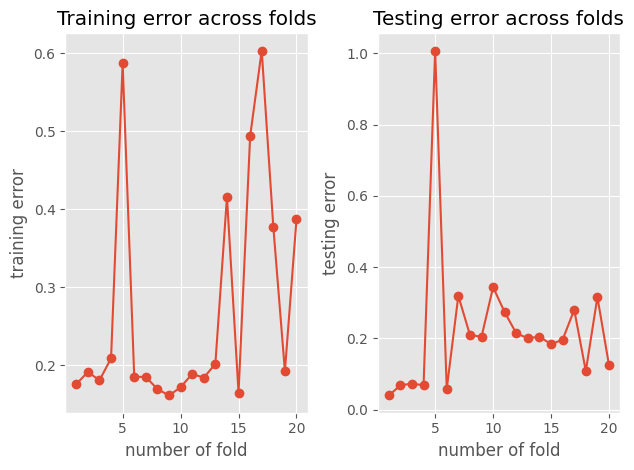

In [ ]:
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() +1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error' )
plt. title('Training error across folds')
plt.tight_layout ()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() +1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout ()
plt.show()